# Data proprocessing

Note that the code was taken from [TensforFlow Documentation](https://www.tensorflow.org/tutorials/keras/regression)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [4]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.5.0


In [5]:
data = np.loadtxt(r"C:\Users\alrum\Google Drive\Projects\Undergraduate Reseearch\Multi-sensor Multi-condition prognostics\Data\train_FD002.txt")

In [6]:
sensor_col_name = ["Sensor "+str(i) for i in range(1,22)]

In [7]:
col_name = ["unit number", "time-cycles", "operational setting 1", "operational setting 2",
            "operational setting 3"] + sensor_col_name

In [8]:
df = pd.DataFrame(data= data, columns= col_name)

In [9]:
df["unit number"] = df["unit number"].apply(lambda x: int(x))

In [10]:
def create_RUL(df, unit_col, cycle_col, total_units):
    
    RUL_list = pd.Series(dtype="int64")
    for unit_i in range(1, total_units+1):
       
        df_subset = df[df[unit_col] == unit_i ]
        max_cycle = max(df_subset[cycle_col])
        
        temp =  max_cycle - df_subset[cycle_col]
        #print(type(temp))
        #temp = pd.Series(temp)
        RUL_list = RUL_list.append(temp)

    
    return RUL_list

In [11]:
RUL_series = create_RUL(df, unit_col="unit number", cycle_col= "time-cycles", total_units=260)

In [12]:
df["RUL"] = RUL_series

In [13]:
df["unit number"] = df["unit number"].apply(lambda x: int(x))

In [14]:
df["time-cycles"] = df["time-cycles"].apply(lambda x: int(x))

In [15]:
df["operational setting 3"] = df["operational setting 3"].apply(lambda x: int(x))

In [16]:
df["RUL"] = df["RUL"].apply(lambda x: int(x))

# Wrangling

In [18]:
dataset = df.copy()
dataset.tail()

,unit number,time-cycles,operational setting 1,operational setting 2,operational setting 3,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,...,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,RUL
53754,260,312,20.0037,0.700,100,491.19,608.79,1495.60,1269.51,9.35,...,2389.02,8169.64,9.3035,0.03,369.0,2324.0,100.00,24.36,14.5189,4
53755,260,313,10.0022,0.251,100,489.05,605.81,1514.32,1324.12,10.52,...,2388.42,8245.36,8.7586,0.03,374.0,2319.0,100.00,28.10,16.9454,3
53756,260,314,25.0041,0.620,60,462.54,537.48,1276.24,1057.92,7.05,...,2030.33,7971.25,11.0657,0.02,310.0,1915.0,84.93,14.19,8.5503,2
53757,260,315,25.0033,0.622,60,462.54,537.84,1272.95,1066.30,7.05,...,2030.35,7972.47,11.0537,0.02,311.0,1915.0,84.93,14.05,8.3729,1
53758,260,316,35.0036,0.840,100,449.44,556.64,1374.61,1145.52,5.48,...,2390.38,8185.35,9.3998,0.02,338.0,2223.0,100.00,14.75,8.8446,0


In [19]:
dataset.isna().sum().sum()

0

# Data Spliting and Visulaization

In [20]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

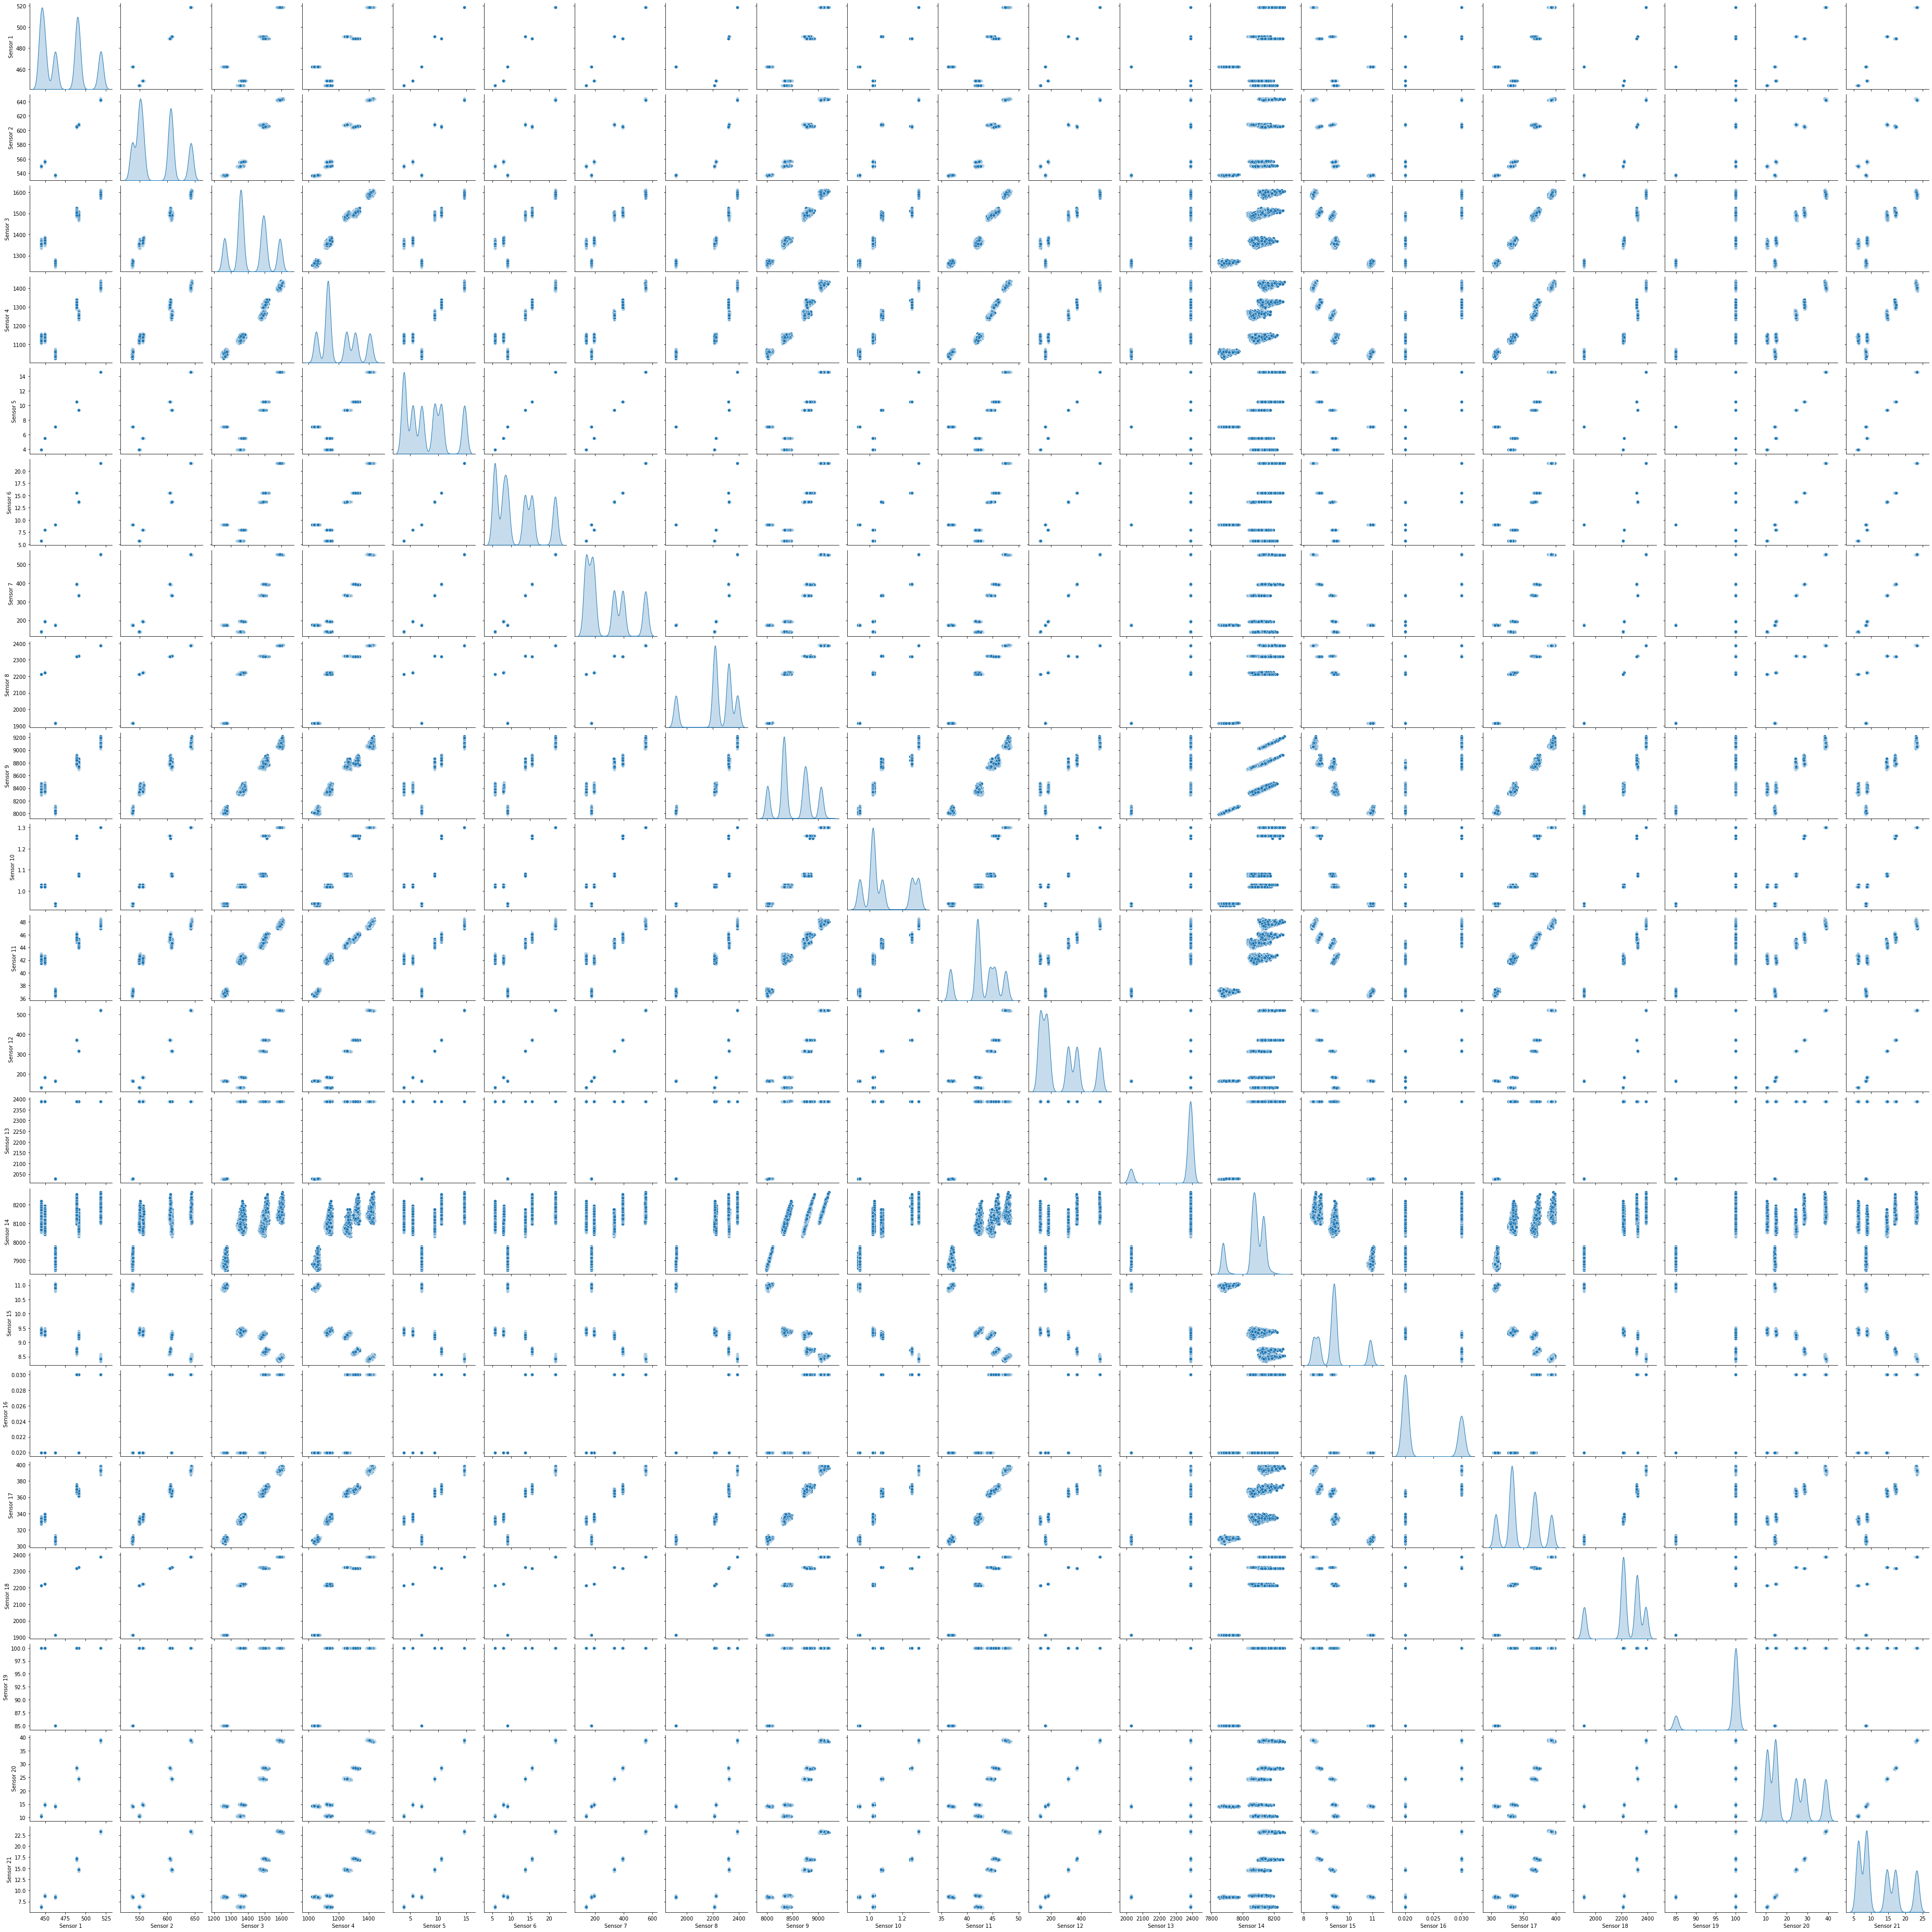

In [21]:
sns.pairplot(train_dataset[sensor_col_name], diag_kind='kde')
plt.savefig("Pairplot-sensors.png")

In [34]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit number,43007.0,131.100309,74.405482,1.0000,68.0000,131.0000,195.0000,260.0000
time-cycles,43007.0,109.032483,69.096658,1.0000,52.0000,104.0000,157.0000,378.0000
operational setting 1,43007.0,24.054300,14.748897,0.0000,10.0047,25.0014,41.9981,42.0080
operational setting 2,43007.0,0.573152,0.309723,0.0000,0.2507,0.7000,0.8400,0.8420
operational setting 3,43007.0,94.091194,14.193059,60.0000,100.0000,100.0000,100.0000,100.0000
Sensor 1,43007.0,472.832694,26.381042,445.0000,445.0000,462.5400,491.1900,518.6700
Sensor 2,43007.0,579.615294,37.239225,535.5300,549.5800,555.9700,607.3400,644.4100
Sensor 3,43007.0,1419.882810,105.728410,1243.7300,1352.7900,1369.1200,1499.3000,1612.8800
Sensor 4,43007.0,1205.297653,118.917651,1023.7700,1123.6600,1138.8400,1306.8200,1439.2300
Sensor 5,43007.0,8.019436,3.612610,3.9100,3.9100,7.0500,10.5200,14.6200


In [36]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('RUL')
test_labels = test_features.pop('RUL')

# Normalization

Although a model might converge without feature normalization, normalization makes training much more stable.

In [37]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
unit number,131.100309,74.405482
time-cycles,109.032483,69.096658
operational setting 1,24.054300,14.748897
operational setting 2,0.573152,0.309723
operational setting 3,94.091194,14.193059
Sensor 1,472.832694,26.381042
Sensor 2,579.615294,37.239225
Sensor 3,1419.882810,105.728410
Sensor 4,1205.297653,118.917651
Sensor 5,8.019436,3.612610


In [38]:
normalizer = preprocessing.Normalization(axis=-1)

In [39]:
normalizer.adapt(np.array(train_features))

In [40]:
print(normalizer.mean.numpy())

[ 131.1    109.032   24.054    0.573   94.091  472.833  579.614 1419.883
 1205.299    8.019   11.584  282.21  2229.072 8524.925    1.095   42.987
  265.695 2334.964 8066.731    9.329    0.023  348.291 2229.003   97.774
   20.761   12.456]


In [41]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 125.     93.     10.      0.25  100.    489.05  604.68 1497.51 1308.23
    10.52   15.49  393.71 2318.93 8777.8     1.26   45.39  371.22 2388.06
  8134.88    8.65    0.03  369.   2319.    100.     28.44   17.11]]

Normalized: [[-0.08 -0.23 -0.95 -1.04  0.42  0.61  0.67  0.73  0.87  0.69  0.72  0.76
   0.62  0.75  1.3   0.75  0.77  0.42  0.81 -0.91  1.42  0.75  0.62  0.42
   0.78  0.79]]


## Linear model as a baseline model

In [42]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [44]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [71]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Wall time: 1min 42s


In [72]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 50])
  plt.xlabel('Epoch')
  plt.ylabel('Error [RUL]')
  plt.legend()
  plt.grid(True)

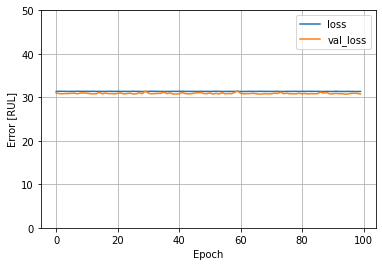

In [73]:
plot_loss(history)

In [74]:
test_results = {}

In [77]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)


In [78]:
test_results

{'linear_model': 32.03483581542969}

# DNN Regression

In [194]:
## Testing RNN

def build_and_compile_model2(norm):
  model = keras.Sequential([
      norm,
      layers.SimpleRNN(20, return_sequences= True),
      layers.SimpleRNN(20, return_sequences= True),
      layers.SimpleRNN(1),
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [195]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [125]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 26)                53        
_________________________________________________________________
dense_33 (Dense)             (None, 64)                1728      
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_35 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 65        
Total params: 10,166
Trainable params: 10,113
Non-trainable params: 53
_________________________________________________________________


In [1]:
14 + 3.75/3 + 15/2

22.75

In [143]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=30)

Wall time: 35.4 s


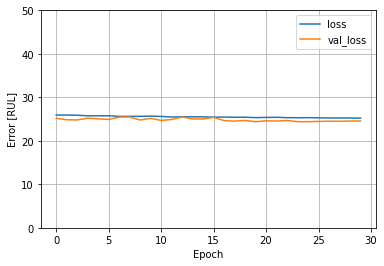

In [144]:
plot_loss(history)

In [145]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [146]:
pd.DataFrame(test_results, index=['Mean absolute error [RUL]']).T

,Mean absolute error [RUL]
linear_model,32.034836
dnn_model,25.949791


## Predictions

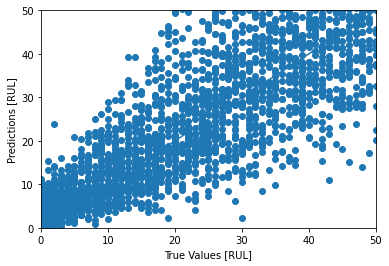

In [192]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [RUL]')
plt.ylabel('Predictions [RUL]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

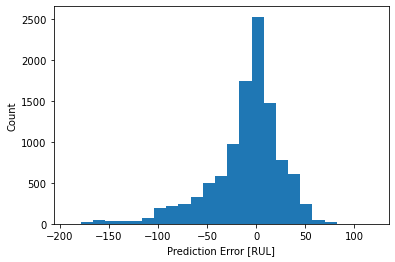

In [185]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [RUL]')
_ = plt.ylabel('Count')

In [191]:
print("Error mean = {:.2f}, Error STD = {:.2f}".format(error.mean(), error.std()))

Error mean = -10.12, Error STD = 36.76


## RUL

In [141]:
df.describe()[["RUL"]]

,RUL
count,53759.000000
mean,108.154746
std,69.180569
min,0.000000
25%,51.000000
50%,103.000000
75%,156.000000
max,377.000000


In [175]:
def S_score(y_true, y_pred):
    score = []
    
    for i in range(len(y_pred)):
        
        if y_true[i] - y_pred[i] <= 0:
            score_i = np.exp(-(y_true[i] - y_pred[i])/10) -1
        else:
            score_i = np.exp( (y_true[i] - y_pred[i])/13) -1
        
        score.append(score_i)

    return np.array(score).sum()

In [183]:
S_score(test_labels.values, test_predictions)

31562137.494510084